In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
import pylab

%matplotlib inline

In [9]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,Хронологический возраст,Адрес,Долгота,Широта,pca(координата),Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,54,"Кировская область, Киров, ул. Некрасова, 53",49.628919,58.583420,0.011685,2850000,14.862830,63758.389262,стандарт,1
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,63,"Кировская область, Киров, Октябрьский пр-т, 8",49.616819,58.638089,0.029066,2100000,14.557448,65625.000000,стандарт,1
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,9,"Кировская область, Киров, село Макарье, Проезж...",49.751737,58.612207,-0.107734,2950000,14.897316,88855.421687,стандарт,1
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,46,"Кировская область, Киров, ул. Карла Маркса, 47",49.667376,58.606375,-0.024346,4450000,15.308415,86240.310078,стандарт,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,2,"Кировская область, Киров, ул. Ивана Попова, 38",49.631758,58.575974,0.008132,5380000,15.498199,98715.596330,стандарт,1


In [10]:
df_1 = df.copy()

In [11]:
df_1.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2'],
      dtype='object')

In [ ]:
# Удаляем лишние столбцы
#df_1=df_1.drop(['Ссылка', 'Способ продажи'], axis=1)
#df_1

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Комнатность']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,0,1,2,3,4
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [13]:
# переименнуе столбцы
df_1 = df_1.rename({0: '1к', 1: '2к', 2: '3к', 3: '4к и более', 4: 'студия'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Этаж 2']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,0,1,2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'первый', 1: 'последний', 2: 'средний'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,первый,последний,средний
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Материал стен']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'деревянный', 1: 'кирпичный', 2: 'монолитный', 3: 'панельный'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,деревянный,кирпичный,монолитный,панельный
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Ремонт']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df_1 = df_1.rename({0: 'дизайнерский', 1: 'евро', 2: 'косметический', 3: 'требует ремонта'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена'>

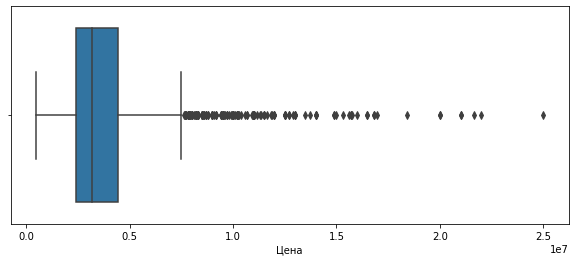

In [28]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['Цена'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Цена)'>

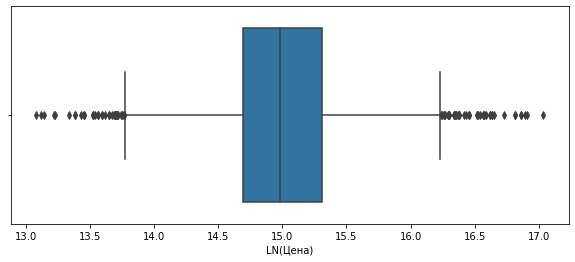

In [29]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['LN(Цена)'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Общая площадь'>

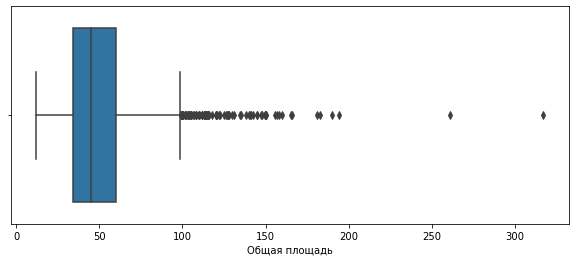

In [30]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['Общая площадь'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Общая площадь)'>

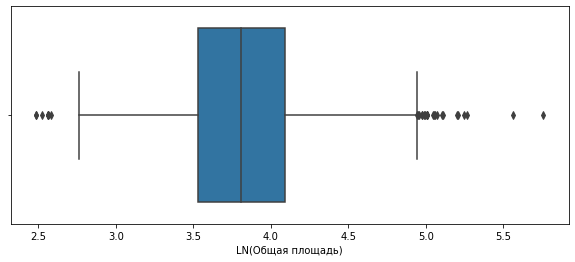

In [31]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['LN(Общая площадь)'])

In [25]:
df_1.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2', '1к', '2к', '3к', '4к и более',
       'студия', 'первый', 'последний', 'средний', 'деревянный', 'кирпичный',
       'монолитный', 'панельный', 'дизайнерский', 'евро', 'косметический',
       'требует ремонта'],
      dtype='object')

In [43]:
df_v1 = df_1.loc[df_1['Общая площадь'] < 90]

In [48]:
df_v1 = df_v1.loc[df_v1['Цена'] < 6000000]
len(df_v1)

2089

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена'>

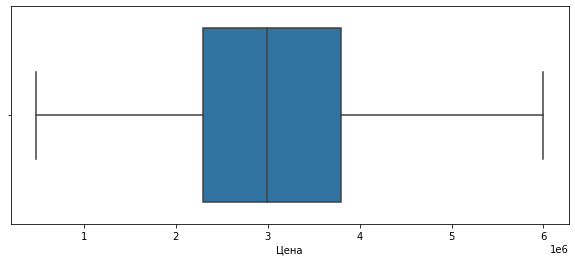

In [49]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v1['Цена'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Общая площадь'>

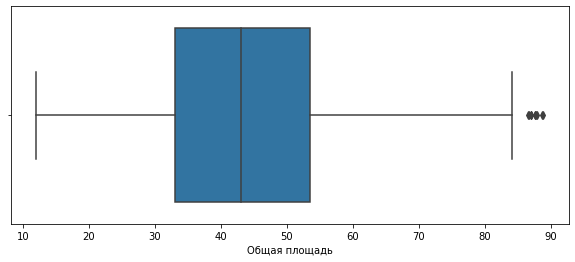

In [50]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v1['Общая площадь'])

In [51]:
df_v2 = df_1.loc[(df_1['LN(Общая площадь)'] > 2.75) & (df_1['LN(Общая площадь)'] < 4.9)]

In [56]:
df_v2 = df_v2.loc[(df_v2['LN(Цена)'] > 13.8) & (df_v2['LN(Цена)'] < 16.1)]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Общая площадь)'>

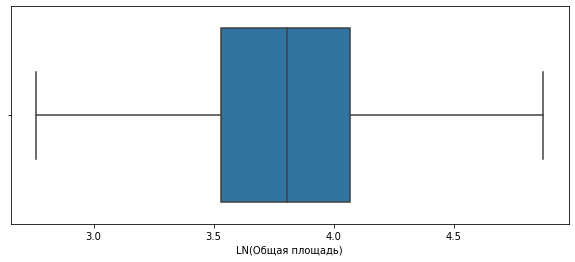

In [58]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['LN(Общая площадь)'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Цена)'>

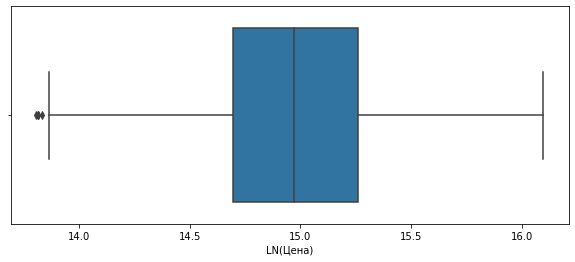

In [57]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['LN(Цена)'])

In [59]:
len(df_v2)

2273

<font size = 3><div style="text-align: justify">**Вариант 1:**</div></font>

In [80]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
           '1к', '2к', '3к', '4к и более','первый', 'последний', 'деревянный', 'панельный', 
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный' и 'кирпичный' уравниваются, 'дизайнерский', 'LN(Общая площадь)'

Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     319.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:33:21   Log-Likelihood:                -24486.
No. Observations:                1671   AIC:                         4.901e+04
Df Residuals:                    1654   BIC:                         4.910e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


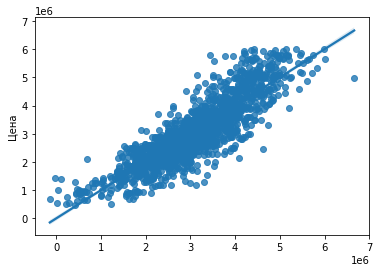

In [81]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 2:**</div></font>

In [104]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '4к и более',
          'первый', 'последний', 'деревянный', 'панельный', 'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     398.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:39:35   Log-Likelihood:                 359.74
No. Observations:                1671   AIC:                            -689.5
Df Residuals:                    1656   BIC:                            -608.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


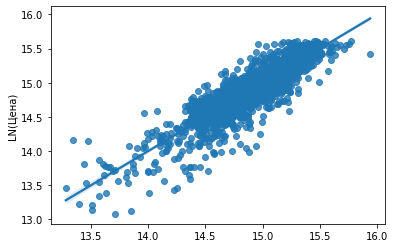

In [105]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 3:**</div></font>

In [131]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 
          'первый', 'последний', 'деревянный', 'панельный', 'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     441.8
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:25:35   Log-Likelihood:                 318.27
No. Observations:                1818   AIC:                            -604.5
Df Residuals:                    1802   BIC:                            -516.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


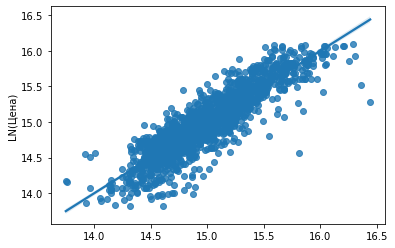

In [123]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 4:**</div></font>

In [167]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     449.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:04:27   Log-Likelihood:                 377.90
No. Observations:                1818   AIC:                            -721.8
Df Residuals:                    1801   BIC:                            -628.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


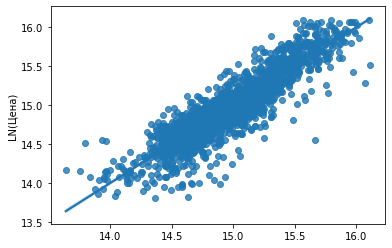

In [168]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<AxesSubplot:>

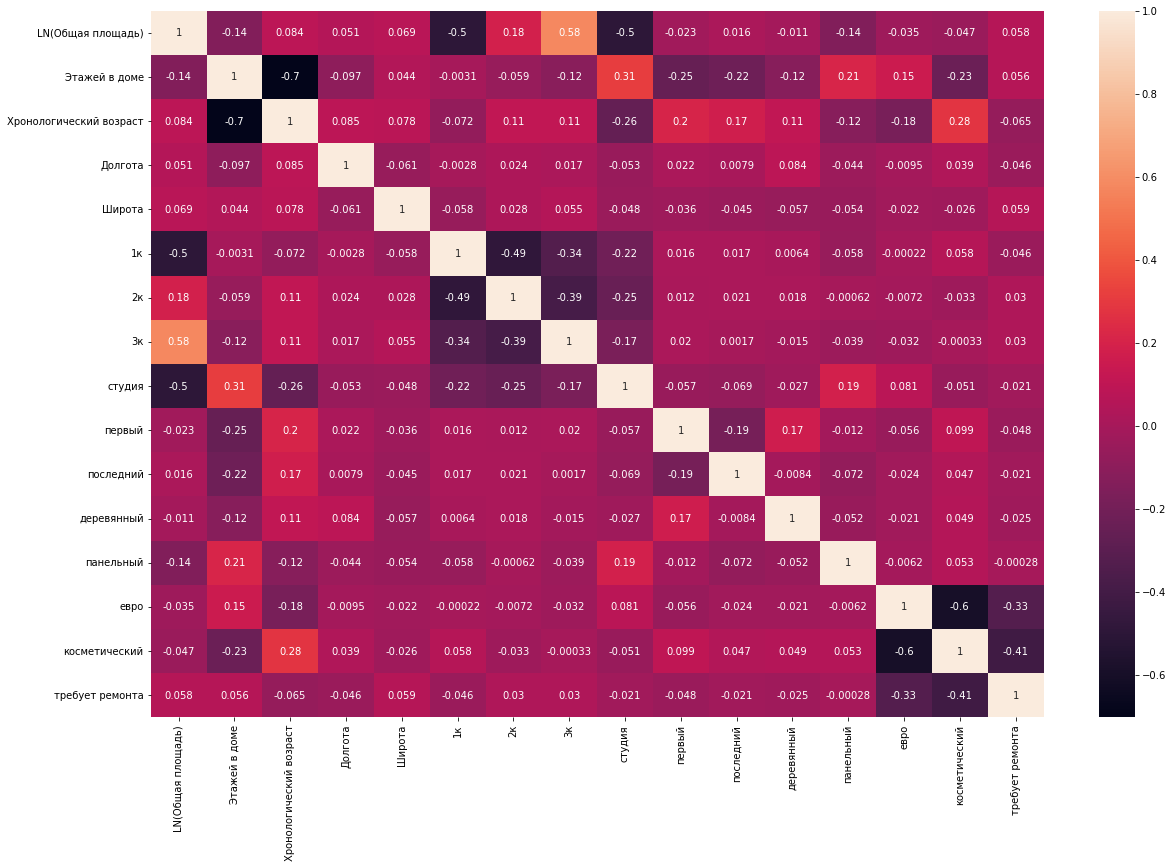

In [142]:
# Строим корреляционную матрицу
numeric_col = ['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']
corr_matrix = df_v2.loc[:,numeric_col].corr(method="pearson") # pearson, kendall, spearman
plt.figure(figsize = (20,13))
sns.heatmap(corr_matrix, annot=True)

<font size = 3><div style="text-align: justify">**Вариант 5:**</div></font>

In [169]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     590.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:04:35   Log-Likelihood:                 365.03
No. Observations:                1818   AIC:                            -704.1
Df Residuals:                    1805   BIC:                            -632.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


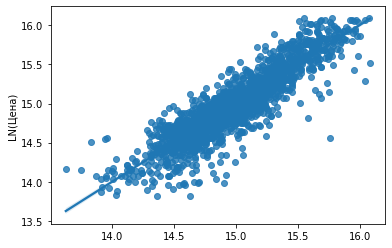

In [170]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 6:**</div></font>

In [191]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
           '1к', '2к', '3к', '4к и более','первый', 'последний', 'деревянный', 'панельный', 
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный' и 'кирпичный' уравниваются, 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
Y = df_v1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:             Цена(кв.м)   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     147.7
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.21e-304
Time:                        21:34:39   Log-Likelihood:                -18144.
No. Observations:                1671   AIC:                         3.632e+04
Df Residuals:                    1654   BIC:                         3.642e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


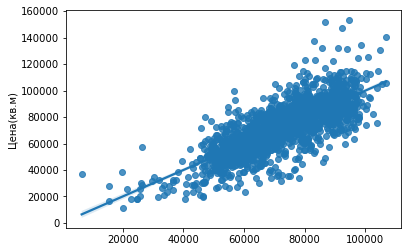

In [192]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

In [ ]:
# df_v1 и df_v2

<font size = 3><div style="text-align: justify">**Преобразование данных (MinMaxScaler):**</div></font>

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [247]:
mms_1 = MinMaxScaler()
mms_1.fit(X_train)

MinMaxScaler()

In [248]:
X_train_norm = pd.DataFrame(mms_1.transform(X_train), columns = X_train.columns)
X_train_norm

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,0.484378,0.153846,0.488,0.696158,0.690057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.604309,0.153846,0.416,0.599817,0.721181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.610935,0.153846,0.416,0.584330,0.649555,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.295296,0.153846,0.472,0.629558,0.590150,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.661586,0.346154,0.248,0.534754,0.628903,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,0.330802,0.153846,0.512,0.700565,0.651168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1814,0.362439,0.153846,0.376,0.738595,0.222594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1815,0.300081,0.153846,0.488,0.696158,0.690057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1816,0.348321,0.307692,0.216,0.684209,0.523350,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [249]:
X_train_norm.describe()

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.00000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,0.493531,0.317657,0.223248,0.650642,0.571349,0.30253,0.354785,0.209571,0.101760,0.147965,0.173267,0.007701,0.283828,0.326183,0.435644,0.177118
std,0.171215,0.202080,0.170273,0.109392,0.197619,0.45948,0.478580,0.407114,0.302416,0.355163,0.378582,0.087440,0.450979,0.468944,0.495977,0.381873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.362787,0.153846,0.064000,0.594243,0.492469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493427,0.307692,0.200000,0.655772,0.585578,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619897,0.500000,0.376000,0.731136,0.684860,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
X_test_norm = pd.DataFrame(mms_1.transform(X_test), columns = X_test.columns)
X_test_norm

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,0.606804,0.346154,0.128,0.586372,0.628313,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.563385,0.576923,0.064,0.740132,0.566672,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.603474,0.115385,0.336,0.786170,0.130458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.561562,0.038462,0.544,0.618014,0.777882,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.419995,0.346154,0.072,0.744055,0.987878,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.438118,0.346154,0.016,0.661907,0.515884,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
451,0.389472,0.615385,0.024,0.516256,0.536242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
452,0.318752,0.153846,0.072,0.492277,0.631133,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.348321,0.576923,0.016,0.747047,0.937561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [251]:
# то, что минимум не 0, а максимум не 1, это нормально
X_test_norm.describe()

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.496770,0.325613,0.219851,0.652066,0.580276,0.276923,0.386813,0.215385,0.087912,0.134066,0.167033,0.002198,0.309890,0.301099,0.419780,0.213187
std,0.160416,0.199258,0.171578,0.103377,0.178718,0.447971,0.487556,0.411541,0.283479,0.341098,0.373416,0.046881,0.462957,0.459241,0.494066,0.410009
min,0.087224,0.038462,0.008000,0.234088,0.010619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367279,0.153846,0.056000,0.585574,0.516808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.497103,0.307692,0.208000,0.653154,0.577438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.615030,0.500000,0.360000,0.730255,0.674329,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,0.962024,0.923077,0.856000,1.022097,0.990819,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [252]:
Y_train = Y_train.reset_index()
Y_train = Y_train.drop('index', axis=1)
Y_train

,LN(Цена)
0,14.946913
1,14.727793
2,14.869823
3,14.946913
4,15.363073
...,...
1813,14.678401
1814,14.414347
1815,14.498607
1816,14.711599


<font size = 3><div style="text-align: justify">**Вариант 7:**</div></font>

In [ ]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     390.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:43:06   Log-Likelihood:                -24543.
No. Observations:                1671   AIC:                         4.911e+04
Df Residuals:                    1658   BIC:                         4.918e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


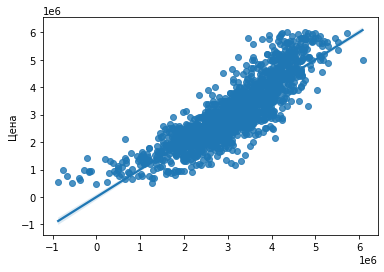

In [244]:
X = sm.add_constant(X_train_norm) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 8:**</div></font>

In [ ]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     449.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:45:16   Log-Likelihood:                 377.90
No. Observations:                1818   AIC:                            -721.8
Df Residuals:                    1801   BIC:                            -628.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


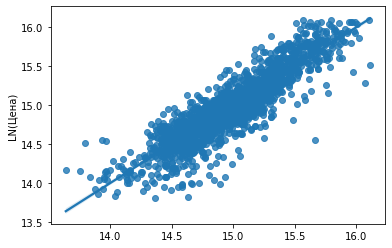

In [253]:
X = sm.add_constant(X_train_norm) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

Изменений нет! Мультиколлинеарность отсутствует! Также, об отсутствии мультиколлинеарности свидетельствует стабильность коэффициентов при независимых переменных.

<font size = 3><div style="text-align: justify">**Преобразование данных (StandardScaler):**</div></font>

In [254]:
from sklearn.preprocessing import StandardScaler

In [259]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [260]:
mms_2 = StandardScaler()
mms_2.fit(X_train)

StandardScaler()

In [261]:
X_train_std = pd.DataFrame(mms_2.transform(X_train), columns = X_train.columns)
X_train_std

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,-0.053478,-0.810845,1.555300,0.416201,0.600859,-0.658600,1.348557,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,1.437278,-0.878595,-0.46394
1,0.647183,-0.810845,1.132333,-0.464733,0.758397,-0.658600,-0.741534,1.942075,-0.336583,-0.416726,-0.45780,-0.088094,1.588476,-0.695760,-0.878595,2.15545
2,0.685896,-0.810845,1.132333,-0.606345,0.395853,-0.658600,-0.741534,1.942075,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,-0.878595,2.15545
3,-1.158136,-0.810845,1.461307,-0.192787,0.095163,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,2.18436,-0.088094,-0.629534,1.437278,-0.878595,-0.46394
4,0.981811,0.141058,0.145409,-1.059665,0.291317,-0.658600,-0.741534,1.942075,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,-0.950699,-0.810845,1.696289,0.456497,0.404014,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,-0.878595,2.15545
1814,-0.765868,-0.810845,0.897351,0.804241,-1.765271,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
1815,-1.130180,-0.810845,1.555300,0.416201,0.600859,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
1816,-0.848353,-0.049323,-0.042576,0.306941,-0.242954,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,2.18436,-0.088094,-0.629534,1.437278,-0.878595,-0.46394


In [262]:
X_test_std = pd.DataFrame(mms_2.transform(X_test), columns = X_test.columns)
X_test_std

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,0.661764,0.141058,-0.559536,-0.587679,0.288330,-0.658600,1.348557,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,1.437278,-0.878595,-0.46394
1,0.408097,1.283341,-0.935506,0.818297,-0.023675,-0.658600,1.348557,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,1.437278,-0.878595,-0.46394
2,0.642306,-1.001226,0.662369,1.239264,-2.231631,-0.658600,1.348557,-0.514913,-0.336583,2.399659,-0.45780,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
3,0.397450,-1.381987,1.884274,-0.298342,1.045394,-0.658600,1.348557,-0.514913,-0.336583,-0.416726,2.18436,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
4,-0.429616,0.141058,-0.888510,0.854168,2.108321,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,1.138180,-0.46394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.323740,0.141058,-1.217484,0.103012,-0.280741,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,-0.629534,-0.695760,-0.878595,2.15545
451,-0.607938,1.473722,-1.170488,-1.228813,-0.177699,-0.658600,1.348557,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,1.588476,-0.695760,1.138180,-0.46394
452,-1.021098,-0.810845,-0.888510,-1.448074,0.302603,1.518372,-0.741534,-0.514913,-0.336583,2.399659,-0.45780,-0.088094,-0.629534,-0.695760,-0.878595,-0.46394
453,-0.848353,1.283341,-1.217484,0.881519,1.853634,1.518372,-0.741534,-0.514913,-0.336583,-0.416726,-0.45780,-0.088094,1.588476,-0.695760,-0.878595,2.15545


In [263]:
Y_train = Y_train.reset_index()
Y_train = Y_train.drop('index', axis=1)
Y_train

,LN(Цена)
0,14.946913
1,14.727793
2,14.869823
3,14.946913
4,15.363073
...,...
1813,14.678401
1814,14.414347
1815,14.498607
1816,14.711599


<font size = 3><div style="text-align: justify">**Вариант 9:**</div></font>

In [ ]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     449.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:44:22   Log-Likelihood:                 377.90
No. Observations:                1818   AIC:                            -721.8
Df Residuals:                    1801   BIC:                            -628.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


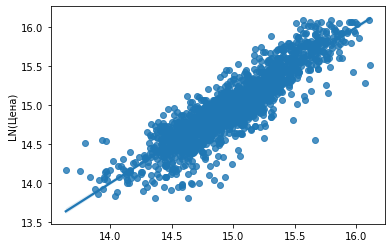

In [264]:
X = sm.add_constant(X_train_std) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Лучшая модель (Вариант 4):**</div></font>

In [278]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     449.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:16:28   Log-Likelihood:                 377.90
No. Observations:                1818   AIC:                            -721.8
Df Residuals:                    1801   BIC:                            -628.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


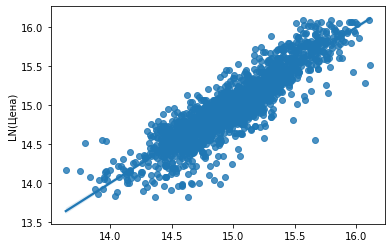

In [279]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

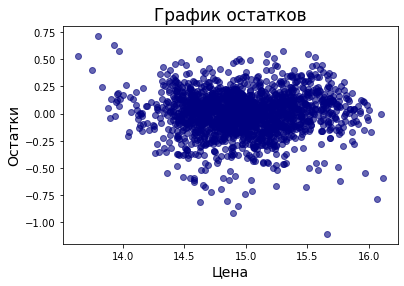

In [267]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


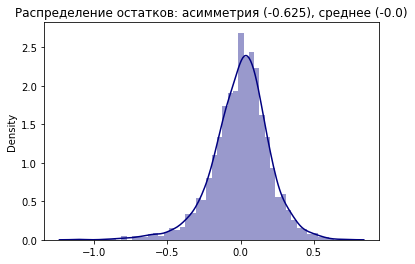

In [268]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [269]:
# Тестирование полученной модели на тестовых данных
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

Trainig R^2: 0.7998
Test R^2: 0.7688


In [272]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#model2 = LinearRegression()

cv_results = cross_val_score(model2, X_train, Y_train, cv=5)
cv_results

array([0.80055718, 0.80857838, 0.77623023, 0.81442404, 0.77533657])

In [273]:
# среднее значение качества модели
cv_results.mean()

0.7950252803006421

In [283]:
Ypred = model2.predict(X_test)

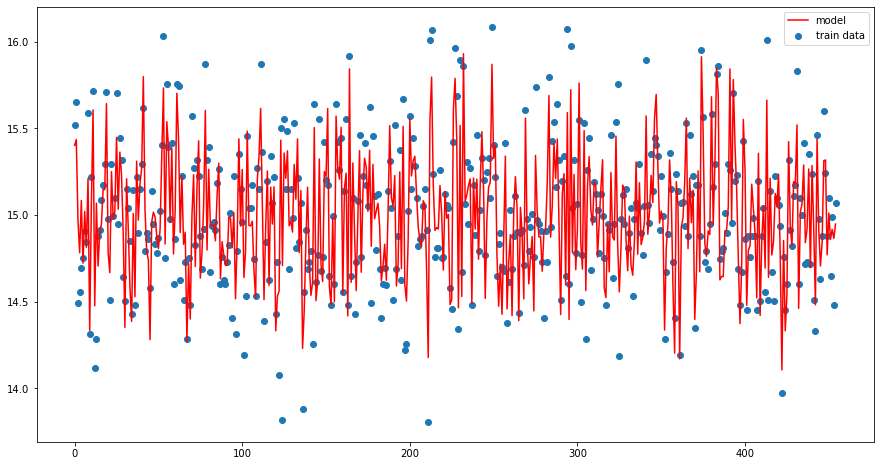

In [284]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), Ypred, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [275]:
# Выведим все полученные коэффициенты
coef=pd.DataFrame({'Коэфф': round(results.params, 4)})
coef

,Коэфф
const,-63.3667
LN(Общая площадь),0.9304
Этажей в доме,0.0046
Хронологический возраст,-0.0070
Долгота,0.6521
Широта,0.7292
1к,0.1506
2к,0.1174
3к,0.1215
студия,0.1150


<font size = 3><div style="text-align: justify">**Работа с выбросами:**</div></font>

In [295]:
#Преобразование данных через метод главной компоненты
#стандартизация не проводилась, так как координаты находятся в одной шкале
from sklearn.decomposition import PCA

dff = df_1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
            '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
            'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_1 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.15354257]


In [296]:
df_pca_1

array([[ 0.51299105],
       [ 1.10974028],
       [-1.09761085],
       ...,
       [ 0.74920102],
       [ 1.81095657],
       [-2.00882367]])

In [297]:
dff = df_1[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
            '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
            'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_2 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.15131734]


In [298]:
df_pca_2

array([[ 0.43428603],
       [ 1.44586909],
       [-0.93796188],
       ...,
       [ 0.60857326],
       [ 1.83795137],
       [-1.5682015 ]])

In [299]:
df_1=df_1.drop(['pca(best_1)', 'pca(best_2)'], axis=1)

In [300]:
df_1.insert(36, "pca(best_1)", df_pca_1)
df_1.insert(37, "pca(best_2)", df_pca_2)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2)
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.512991,0.434286
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.109740,1.445869
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.097611,-0.937962
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.400723,0.213860
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.453045,-1.746367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-2.783536,-2.413190
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.772573,-2.041015
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.749201,0.608573
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.810957,1.837951


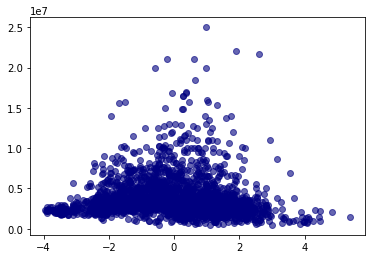

In [302]:
plt.scatter(x=df_1['pca(best_2)'], y=df_1['Цена'], c='navy', alpha=0.6)
plt.show()

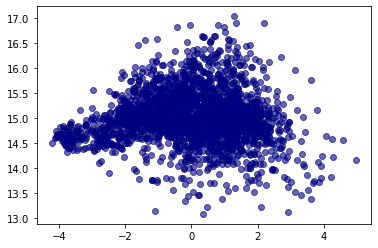

In [303]:
plt.scatter(x=df_1['pca(best_1)'], y=df_1['LN(Цена)'], c='navy', alpha=0.6)
plt.show()

<font size = 2><div style="text-align: justify">**KNN(LN(Цена) и LN(Общая площадь)):**</div></font>

In [325]:
from pyod.models.knn import KNN

In [396]:
X = df_1[['LN(Цена)', 'pca(best_1)']]

#Y = df_1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [397]:
clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [398]:
Y_train_pred = clf.labels_

In [399]:
Y_train_scores = clf.decision_scores_

In [400]:
Y_train_scores

array([0.06038346, 0.04347426, 0.08743427, ..., 0.0523429 , 0.09339002,
       0.11808171])

In [401]:
v = Y_train_pred

In [402]:
v.sum()

241

In [403]:
X.insert(2, "выбросы_метки", v)
X

,LN(Цена),pca(best_1),выбросы_метки
0,14.862830,0.512991,0
1,14.557448,1.109740,0
2,14.897316,-1.097611,0
3,15.308415,0.400723,0
4,15.498199,-1.453045,0
...,...,...,...
2400,14.578417,-2.783536,0
2401,15.221203,-1.772573,0
2402,15.114071,0.749201,0
2403,14.580978,1.810957,0


C:\Users\skapr\AppData\Local\Temp\ipykernel_10844\3305344262.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


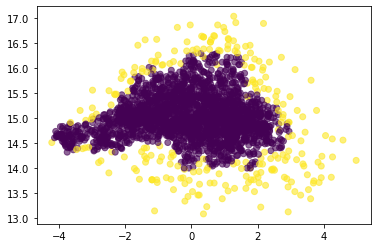

In [404]:
plt.scatter(x=X['pca(best_1)'], y=X['LN(Цена)'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

<font size = 2><div style="text-align: justify">**KNN(Цена и Общая площадь):**</div></font>

In [362]:
X = df_1[['Цена', 'pca(best_2)']]

clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [363]:
Y_train_pred = clf.labels_
v = Y_train_pred

In [364]:
v.sum()

240

In [365]:
X.insert(2, "выбросы_метки", v)
X

,Цена,pca(best_2),выбросы_метки
0,2850000,0.434286,0
1,2100000,1.445869,0
2,2950000,-0.937962,0
3,4450000,0.213860,0
4,5380000,-1.746367,0
...,...,...,...
2400,2144500,-2.413190,0
2401,4078350,-2.041015,0
2402,3664020,0.608573,0
2403,2150000,1.837951,0


C:\Users\skapr\AppData\Local\Temp\ipykernel_10844\925752179.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


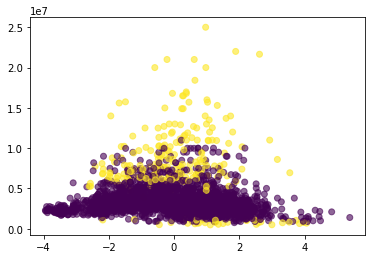

In [366]:
plt.scatter(x=X['pca(best_2)'], y=X['Цена'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

In [405]:
df_1['выбросы_метки'] = v
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2),выбросы_метки
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.512991,0.434286,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.109740,1.445869,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.097611,-0.937962,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.400723,0.213860,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.453045,-1.746367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-2.783536,-2.413190,0
2401,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.772573,-2.041015,0
2402,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.749201,0.608573,0
2403,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.810957,1.837951,0


In [406]:
df_i = df_1.copy()

In [407]:
df_i = df_i.loc[df_i['выбросы_метки'] == 0]
len(df_i)

2164

In [431]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_i[['LN(Общая площадь)', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
          'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_i['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     675.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:44:23   Log-Likelihood:                 486.91
No. Observations:                1731   AIC:                            -949.8
Df Residuals:                    1719   BIC:                            -884.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skapr\AppData\Local\Temp\ipykernel_10844\106401591.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


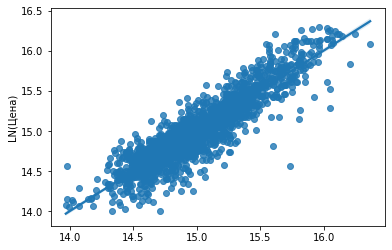

In [432]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

C:\Users\skapr\AppData\Local\Temp\ipykernel_10844\3351901943.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


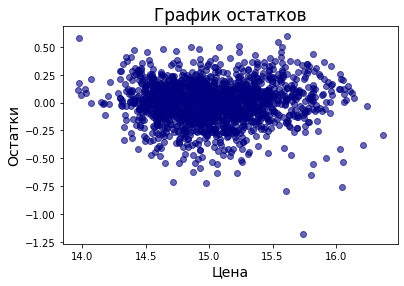

In [421]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\skapr\AppData\Local\Temp\ipykernel_10844\1738737157.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


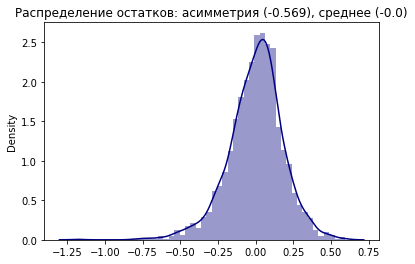

In [422]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [423]:
# Тестирование полученной модели на тестовых данных
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

Trainig R^2: 0.8122
Test R^2: 0.8004


In [424]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#model2 = LinearRegression()

cv_results = cross_val_score(model2, X_train, Y_train, cv=5)
cv_results

array([0.80014495, 0.77653868, 0.77871033, 0.83232153, 0.846929  ])

In [425]:
# среднее значение качества модели
cv_results.mean()

0.8069288999637096

In [426]:
Ypred = model2.predict(X_test)

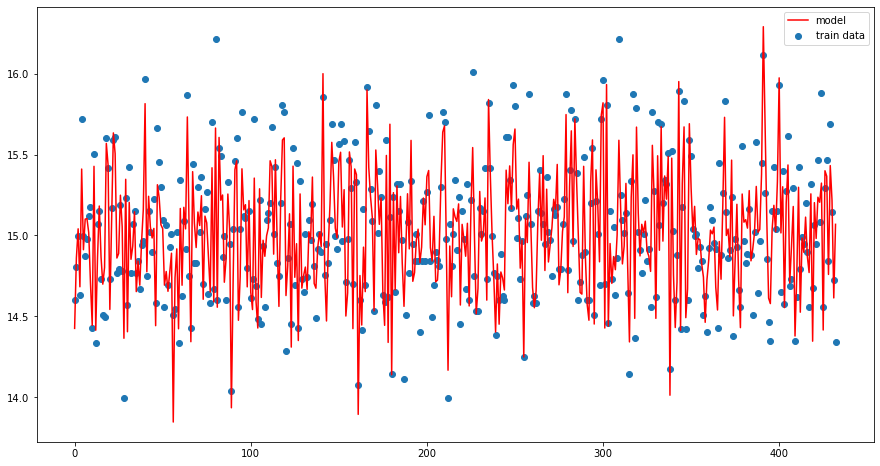

In [427]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), Ypred, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [435]:
pred_train = model2.predict(X_train)

In [437]:
from sklearn.metrics import mean_absolute_error as mae
print("MAE на обучении:", round(mae(Y_train, pred_train), 5))
print("MAE на тесте:", round(mae(Y_test, Ypred), 5))

MAE на обучении: 0.138
MAE на тесте: 0.1447


In [444]:
import math
math.exp(0.1447)

1.15569281041352

In [428]:
# Выведим все полученные коэффициенты
coef=pd.DataFrame({'Коэфф': round(results.params, 4)})
coef

,Коэфф
const,-38.6772
LN(Общая площадь),0.8949
Хронологический возраст,-0.0076
Долгота,0.4080
Широта,0.5200
первый,-0.0490
последний,-0.0339
деревянный,-0.6310
панельный,-0.0839
евро,-0.1268


<font size = 2><div style="text-align: justify">**Цена = EXP(-38.6772 + 0.8949 х LN(S) - 0.0076 х Тхр + 0.4080 х Д + 0.52 х Ш - 0.049 х Э1 - 0.0339 х ЭП - 0.6310 х Дер - 0.0839 х Пан - 0.1268 х ЕВ - 0.2546 х Кос - 0.3337 х ТР) х Торг**</div></font>

где:
1. LN(S) - логарифм площади квартиры.
2. Тхр - хронологический возраст дома.
3. Д - долгота (местоположение).
4. Ш - широта (местоположение).
5. Э1 - первый этаж.
6. ЭП - последний этаж.
7. Дер - материал стен - дерево.
8. Пан - материал стен - панель.
9. ЕВ - состояние отделки - евроремонт.
10. Кос - состояние отделки - косметический (не требует ремонта).
11. ТР - состояние отделки - требует ремонта.

Также учтено в модели:
Средний этаж - квартиры, расположенные на средних этажах.
Дизайнерский ремонт - ремонт из дорогих материалов со сложными решениями.
Кирпич и монолит - материал стен (объединены в одну группу).

В целом модель получилась адекватной, существенное влияние мультиколлинеарности на коэффициенты при независимых переменных - отсутствует. Остатки распределены ненормально, о чем говорит острая вершина гистограммы и ее хвосты, но гистограмма имеет колоколообразную форму, что приближает ее к нормальному распределению. Метрика R2 (в соответствии с кросс-валидацией) составляет 80%.